# Project 4 - West Nile Virus Prediction
Group member
- Larb
- B.B.
- PuNt

Part 1/2

## Data preparation, Data Exploration Analysis, Data Preprocessing 

### Data preparation

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KernelDensity
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.impute import KNNImputer
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import plotly.express as px
import math



pd.set_option('display.max_columns', 200)

In [3]:
# Import data from file into dataframes
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')
df_spray = pd.read_csv('../data/spray.csv')
df_weather = pd.read_csv('../data/weather.csv')


### Exploratory Data Analysis

##### Data treatment (null and abnormal value management)

In [4]:
# check the look of each dataframe
# train data
df_train.head(5)


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [5]:
# test data
df_test.head(5)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [6]:
# Weather data
df_weather.head(5)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [7]:
# Spray data
df_spray.head(5)

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [8]:
# compare spatial data (block, trap) between train and test data
print(f' the number of Block in train data is {len(df_train["Block"].unique())}')
print(f' the number of Block in test data is {len(df_test["Block"].unique())}')
print(f' the number of Trap in train data is {len(df_train["Trap"].unique())}')
print(f' the number of Trap in test data is {len(df_test["Trap"].unique())}')

 the number of Block in train data is 64
 the number of Block in test data is 65
 the number of Trap in train data is 136
 the number of Trap in test data is 149


Train data is shorted in term of spatial index compare to test data

Check null data for each Dataframe

In [9]:
#check null data in each dataframe
df_train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [10]:
df_test.isnull().sum()

Id                        0
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
dtype: int64

In [11]:
df_spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [12]:
df_weather.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

Only spray data has null value

Let's check the spray data

In [13]:
# When the spray was done
df_spray['Date'].unique()

array(['2011-08-29', '2011-09-07', '2013-07-17', '2013-07-25',
       '2013-08-08', '2013-08-15', '2013-08-16', '2013-08-22',
       '2013-08-29', '2013-09-05'], dtype=object)

In [14]:
# time frame of test data
df_test['Date'].unique()

array(['2008-06-11', '2008-06-17', '2008-06-24', '2008-07-01',
       '2008-07-04', '2008-07-11', '2008-07-14', '2008-07-21',
       '2008-07-23', '2008-07-24', '2008-07-28', '2008-07-29',
       '2008-08-04', '2008-08-05', '2008-08-12', '2008-08-13',
       '2008-08-19', '2008-08-25', '2008-08-26', '2008-09-02',
       '2008-09-03', '2008-09-09', '2008-09-15', '2008-09-19',
       '2008-09-29', '2010-06-02', '2010-06-11', '2010-06-18',
       '2010-06-25', '2010-06-28', '2010-07-01', '2010-07-02',
       '2010-07-12', '2010-07-13', '2010-07-16', '2010-07-19',
       '2010-07-23', '2010-07-26', '2010-07-29', '2010-07-30',
       '2010-08-05', '2010-08-06', '2010-08-13', '2010-08-19',
       '2010-08-20', '2010-08-26', '2010-08-27', '2010-09-02',
       '2010-09-10', '2010-09-13', '2010-09-16', '2010-09-17',
       '2010-09-23', '2010-09-24', '2010-10-01', '2012-06-08',
       '2012-06-15', '2012-06-21', '2012-06-29', '2012-07-09',
       '2012-07-13', '2012-07-19', '2012-07-20', '2012-

Test data has no time period in 2011 and 2013, where spray was done only in 2011 and 2013. There is no linkage from spray to test data
- consider not to use spray data for modelling

Let's clean train data

In [15]:
# remove duplicate (if there is any)
print("Before remove duplicates")
print(df_train.shape)
df_train.drop_duplicates(inplace=True)
print("Afer remove duplicates")
print(df_train.shape)

Before remove duplicates
(10506, 12)
Afer remove duplicates
(9693, 12)


์Now there is no duplicate record in train data

Let's clean weather data

In [16]:
# check weather head again
df_weather.head(5)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


Previously we checked and there is no "null" value in weather data. But from what we see above, there are some missing data

So let's replace these value with NaN, and drop those rows

In [17]:
#Fill non-readable value with NaN across dataframe
df_weather = df_weather.replace('M', np.nan)
df_weather = df_weather.replace('-', np.nan)
df_weather = df_weather.replace('T', np.nan)
df_weather = df_weather.replace(' T', np.nan)
df_weather = df_weather.replace('  T', np.nan)
df_weather = df_weather.replace(' ', np.nan)

In [18]:
#Drop some column that has too many non-numbers
df_weather = df_weather.drop(['Water1','Depth', 'SnowFall','Sunrise','Sunset','Depart','CodeSum'], axis=1)

In [19]:
# Drop rows with any null (NaN) values
df_weather = df_weather.dropna(subset=['Tavg'])
df_weather = df_weather.dropna(subset=['Heat'])
df_weather = df_weather.dropna(subset=['Cool'])
df_weather = df_weather.dropna(subset=['WetBulb'])
df_weather = df_weather.dropna(subset=['StnPressure'])
df_weather = df_weather.dropna(subset=['SeaLevel'])
df_weather = df_weather.dropna(subset=['AvgSpeed'])

In [20]:
#PrecipTotal look usable, let's fill NaN with median
PrecipTotal_median = df_weather['PrecipTotal'].median()
df_weather['PrecipTotal'] = df_weather['PrecipTotal'].fillna(value=PrecipTotal_median)

Weather data looks complete, let's see what else can be done

In [21]:
#convert Data type to number
df_weather['Tavg'] = df_weather['Tavg'].astype(int)
df_weather['WetBulb'] = df_weather['WetBulb'].astype(int)
df_weather['Heat'] = df_weather['Heat'].astype(int)
df_weather['Cool'] = df_weather['Cool'].astype(int)
df_weather['PrecipTotal'] = df_weather['PrecipTotal'].astype(float)
df_weather['StnPressure'] = df_weather['StnPressure'].astype(float)
df_weather['SeaLevel'] = df_weather['SeaLevel'].astype(float)
df_weather['AvgSpeed'] = df_weather['AvgSpeed'].astype(float)

In [22]:
# check the record of each station class (1 and 2)
print(len(df_weather[df_weather['Station']==1]['Date'].unique()))
print(len(df_weather[df_weather['Station']==2]['Date'].unique()))

1464
1456


In [23]:
# check duplicate in df_weather
df_weather[df_weather.duplicated()]

# there is no duplicate in df_weather

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed


Since both station class has about the same record and we don't know the location of each station. Let's split both and re-merge them together with date. So we have more features for modelling

In [24]:
#Split station
df_weather_s1 = df_weather[df_weather['Station'] == 1]
df_weather_s2 = df_weather[df_weather['Station'] == 2]
df_weather_s1 = df_weather_s1.drop('Station', axis=1)
df_weather_s2 = df_weather_s2.drop('Station', axis=1)

In [25]:
#merge station 1 and 2
df_weather = df_weather_s1.merge(df_weather_s2, on='Date')
df_weather.head()

,Date,Tmax_x,Tmin_x,Tavg_x,DewPoint_x,WetBulb_x,Heat_x,Cool_x,PrecipTotal_x,StnPressure_x,SeaLevel_x,ResultSpeed_x,ResultDir_x,AvgSpeed_x,Tmax_y,Tmin_y,Tavg_y,DewPoint_y,WetBulb_y,Heat_y,Cool_y,PrecipTotal_y,StnPressure_y,SeaLevel_y,ResultSpeed_y,ResultDir_y,AvgSpeed_y
0,2007-05-01,83,50,67,51,56,0,2,0.0,29.10,29.82,1.7,27,9.2,84,52,68,51,57,0,3,0.0,29.18,29.82,2.7,25,9.6
1,2007-05-02,59,42,51,42,47,14,0,0.0,29.38,30.09,13.0,4,13.4,60,43,52,42,47,13,0,0.0,29.44,30.08,13.3,2,13.4
2,2007-05-03,66,46,56,40,48,9,0,0.0,29.39,30.12,11.7,7,11.9,67,48,58,40,50,7,0,0.0,29.46,30.12,12.9,6,13.2
3,2007-05-05,66,53,60,38,49,5,0,0.0,29.40,30.10,11.7,7,12.0,66,54,60,39,50,5,0,0.0,29.46,30.09,11.2,7,11.5
4,2007-05-06,68,49,59,30,46,6,0,0.0,29.57,30.29,14.4,11,15.0,68,52,60,30,46,5,0,0.0,29.62,30.28,13.8,10,14.5


In [26]:
# Merge train and test data with weather data
df_train = df_train.merge(df_weather, on='Date')
df_test = df_test.merge(df_weather, on='Date')
df_train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Tmax_x,Tmin_x,Tavg_x,DewPoint_x,WetBulb_x,Heat_x,Cool_x,PrecipTotal_x,StnPressure_x,SeaLevel_x,ResultSpeed_x,ResultDir_x,AvgSpeed_x,Tmax_y,Tmin_y,Tavg_y,DewPoint_y,WetBulb_y,Heat_y,Cool_y,PrecipTotal_y,StnPressure_y,SeaLevel_y,ResultSpeed_y,ResultDir_y,AvgSpeed_y
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,88,60,74,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5,88,65,77,59,66,0,12,0.0,29.44,30.09,5.8,16,7.4
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,88,60,74,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5,88,65,77,59,66,0,12,0.0,29.44,30.09,5.8,16,7.4
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,88,60,74,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5,88,65,77,59,66,0,12,0.0,29.44,30.09,5.8,16,7.4
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,88,60,74,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5,88,65,77,59,66,0,12,0.0,29.44,30.09,5.8,16,7.4
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,88,60,74,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5,88,65,77,59,66,0,12,0.0,29.44,30.09,5.8,16,7.4


Extract datetime to year, month, date

In [27]:
# Train data
# Convert 'Date' column to datetime
df_train['Date'] = pd.to_datetime(df_train['Date'], errors='coerce')


# Extract day, month, and year components
df_train['day'] = df_train['Date'].dt.day
df_train['month'] = df_train['Date'].dt.month
df_train['year'] = df_train['Date'].dt.year

# Drop the original 'Date' column
df_train = df_train.drop('Date', axis=1)

df_train.head()

,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Tmax_x,Tmin_x,Tavg_x,DewPoint_x,WetBulb_x,Heat_x,Cool_x,PrecipTotal_x,StnPressure_x,SeaLevel_x,ResultSpeed_x,ResultDir_x,AvgSpeed_x,Tmax_y,Tmin_y,Tavg_y,DewPoint_y,WetBulb_y,Heat_y,Cool_y,PrecipTotal_y,StnPressure_y,SeaLevel_y,ResultSpeed_y,ResultDir_y,AvgSpeed_y,day,month,year
0,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,88,60,74,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5,88,65,77,59,66,0,12,0.0,29.44,30.09,5.8,16,7.4,29,5,2007
1,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,88,60,74,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5,88,65,77,59,66,0,12,0.0,29.44,30.09,5.8,16,7.4,29,5,2007
2,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,88,60,74,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5,88,65,77,59,66,0,12,0.0,29.44,30.09,5.8,16,7.4,29,5,2007
3,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,88,60,74,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5,88,65,77,59,66,0,12,0.0,29.44,30.09,5.8,16,7.4,29,5,2007
4,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,88,60,74,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5,88,65,77,59,66,0,12,0.0,29.44,30.09,5.8,16,7.4,29,5,2007


In [28]:
# Test data
# Convert 'Date' column to datetime
df_test['Date'] = pd.to_datetime(df_test['Date'], errors='coerce')


# Extract day, month, and year components
df_test['day'] = df_test['Date'].dt.day
df_test['month'] = df_test['Date'].dt.month
df_test['year'] = df_test['Date'].dt.year

# Drop the original 'Date' column
df_test = df_test.drop('Date', axis=1)

df_test.head()

,Id,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,Tmax_x,Tmin_x,Tavg_x,DewPoint_x,WetBulb_x,Heat_x,Cool_x,PrecipTotal_x,StnPressure_x,SeaLevel_x,ResultSpeed_x,ResultDir_x,AvgSpeed_x,Tmax_y,Tmin_y,Tavg_y,DewPoint_y,WetBulb_y,Heat_y,Cool_y,PrecipTotal_y,StnPressure_y,SeaLevel_y,ResultSpeed_y,ResultDir_y,AvgSpeed_y,day,month,year
0,1,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,86,61,74,56,64,0,9,0.0,29.28,29.99,8.9,18,10.0,86,66,76,55,64,0,11,0.0,29.34,29.97,9.4,18,10.4,11,6,2008
1,2,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,86,61,74,56,64,0,9,0.0,29.28,29.99,8.9,18,10.0,86,66,76,55,64,0,11,0.0,29.34,29.97,9.4,18,10.4,11,6,2008
2,3,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,86,61,74,56,64,0,9,0.0,29.28,29.99,8.9,18,10.0,86,66,76,55,64,0,11,0.0,29.34,29.97,9.4,18,10.4,11,6,2008
3,4,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,86,61,74,56,64,0,9,0.0,29.28,29.99,8.9,18,10.0,86,66,76,55,64,0,11,0.0,29.34,29.97,9.4,18,10.4,11,6,2008
4,5,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,86,61,74,56,64,0,9,0.0,29.28,29.99,8.9,18,10.0,86,66,76,55,64,0,11,0.0,29.34,29.97,9.4,18,10.4,11,6,2008


##### Exploring Data

Check data

Text(0.5, 1.0, 'Correlation between columns')

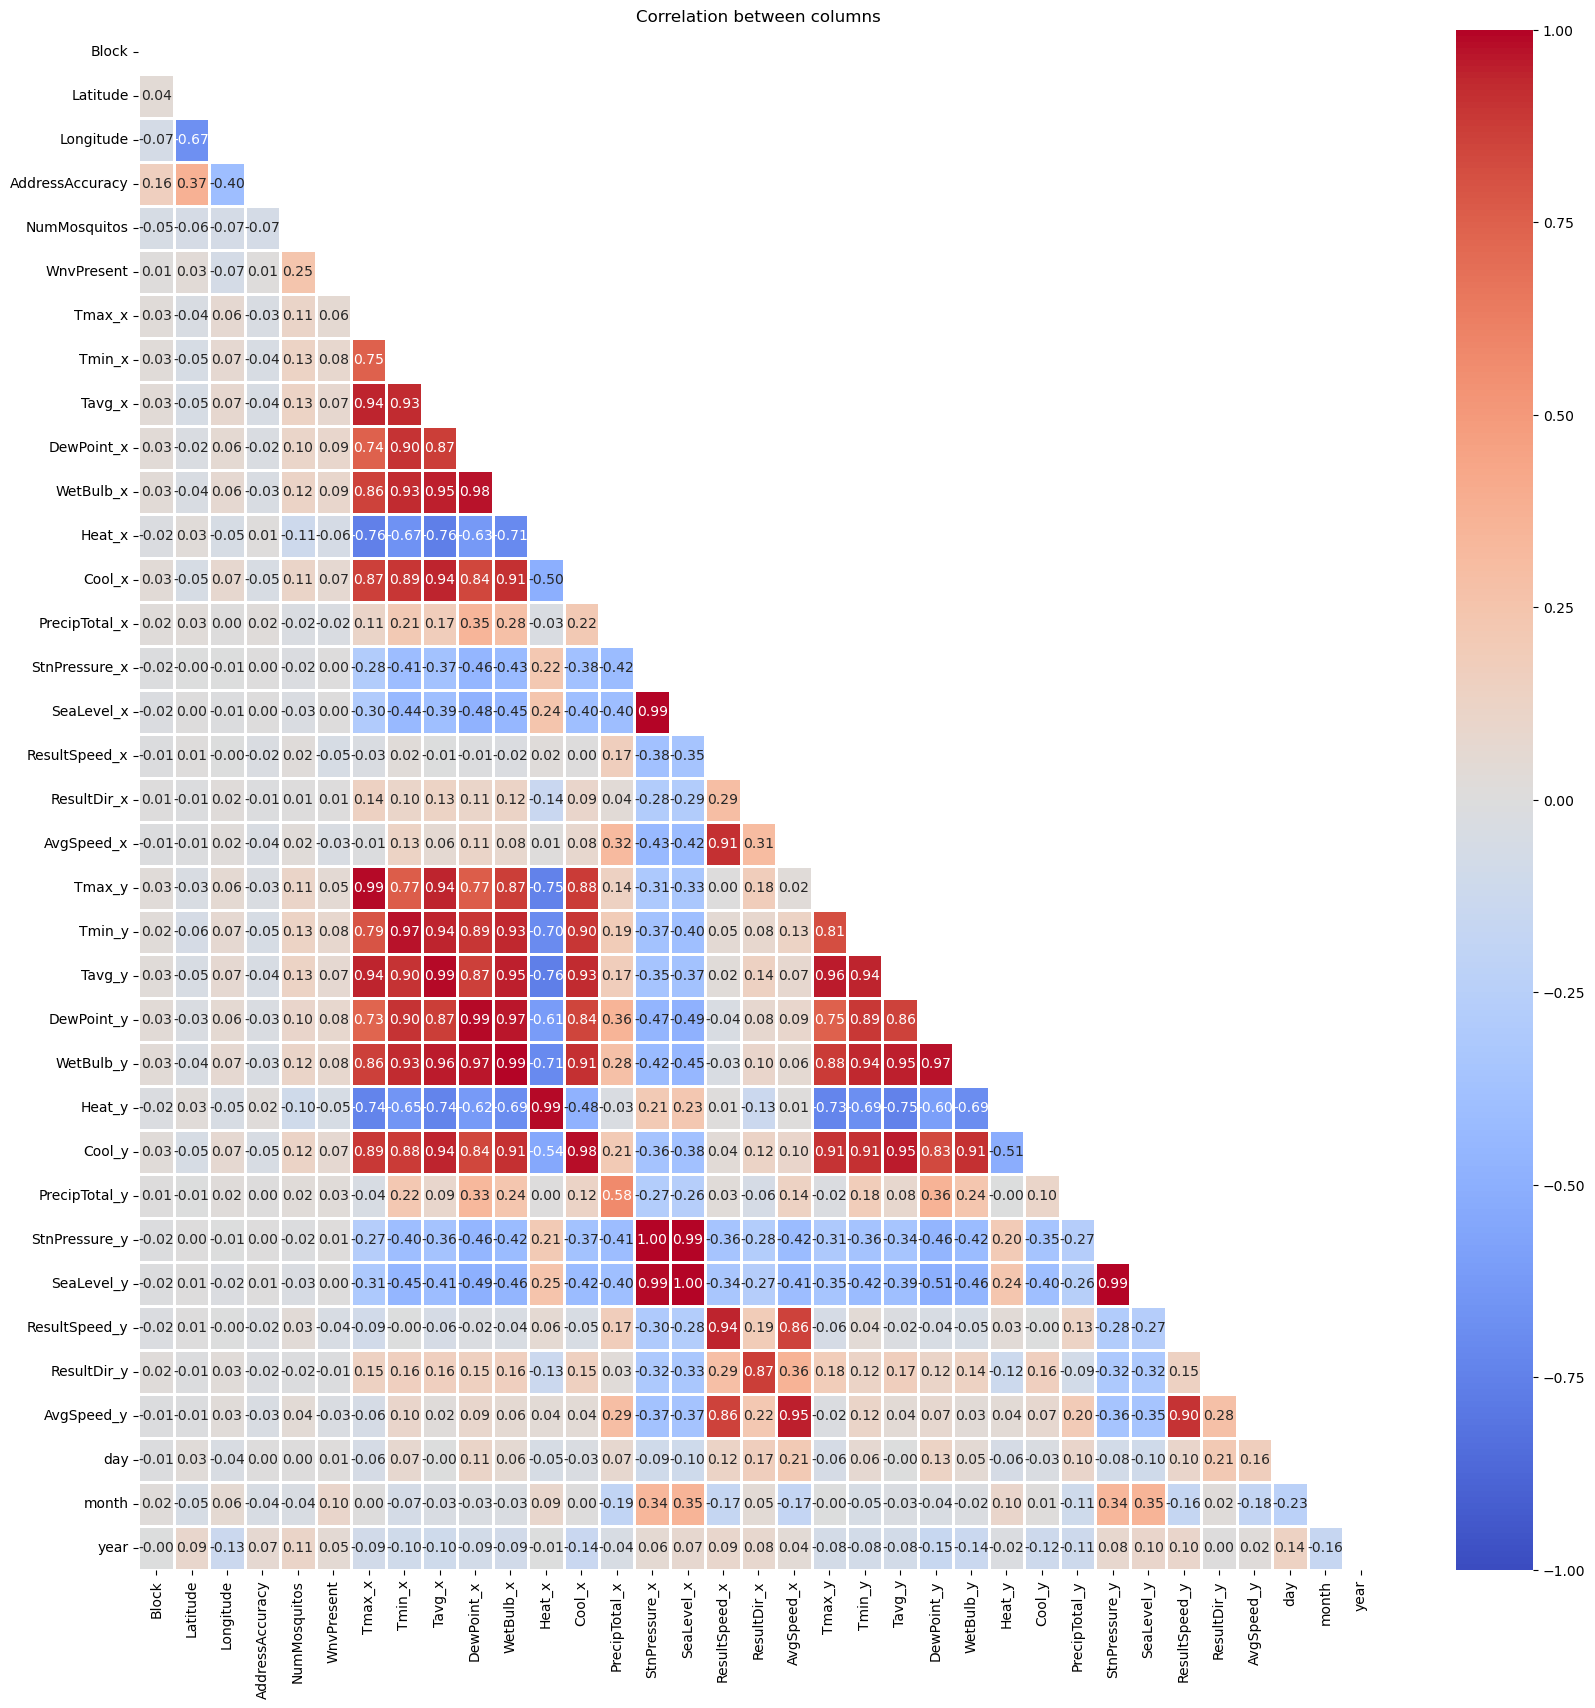

In [29]:
# Let's see correlation between columns, also create mask to hide upper triangle
corr = df_train.corr(numeric_only=True)
plt.figure(figsize=(20,20))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask, cmap='coolwarm', vmin=-1, vmax=1, linewidth=1, linecolor='white')
plt.title('Correlation between columns')

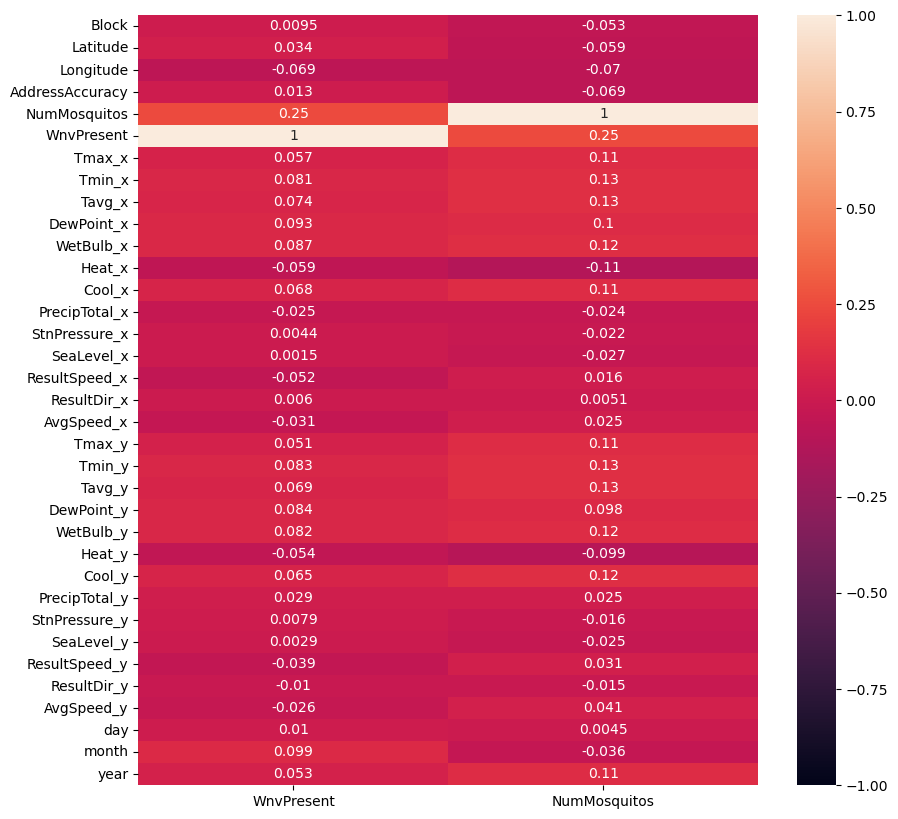

In [30]:
## Correlations
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(numeric_only=True)[['WnvPresent','NumMosquitos']], annot=True, vmin=-1, vmax=1);

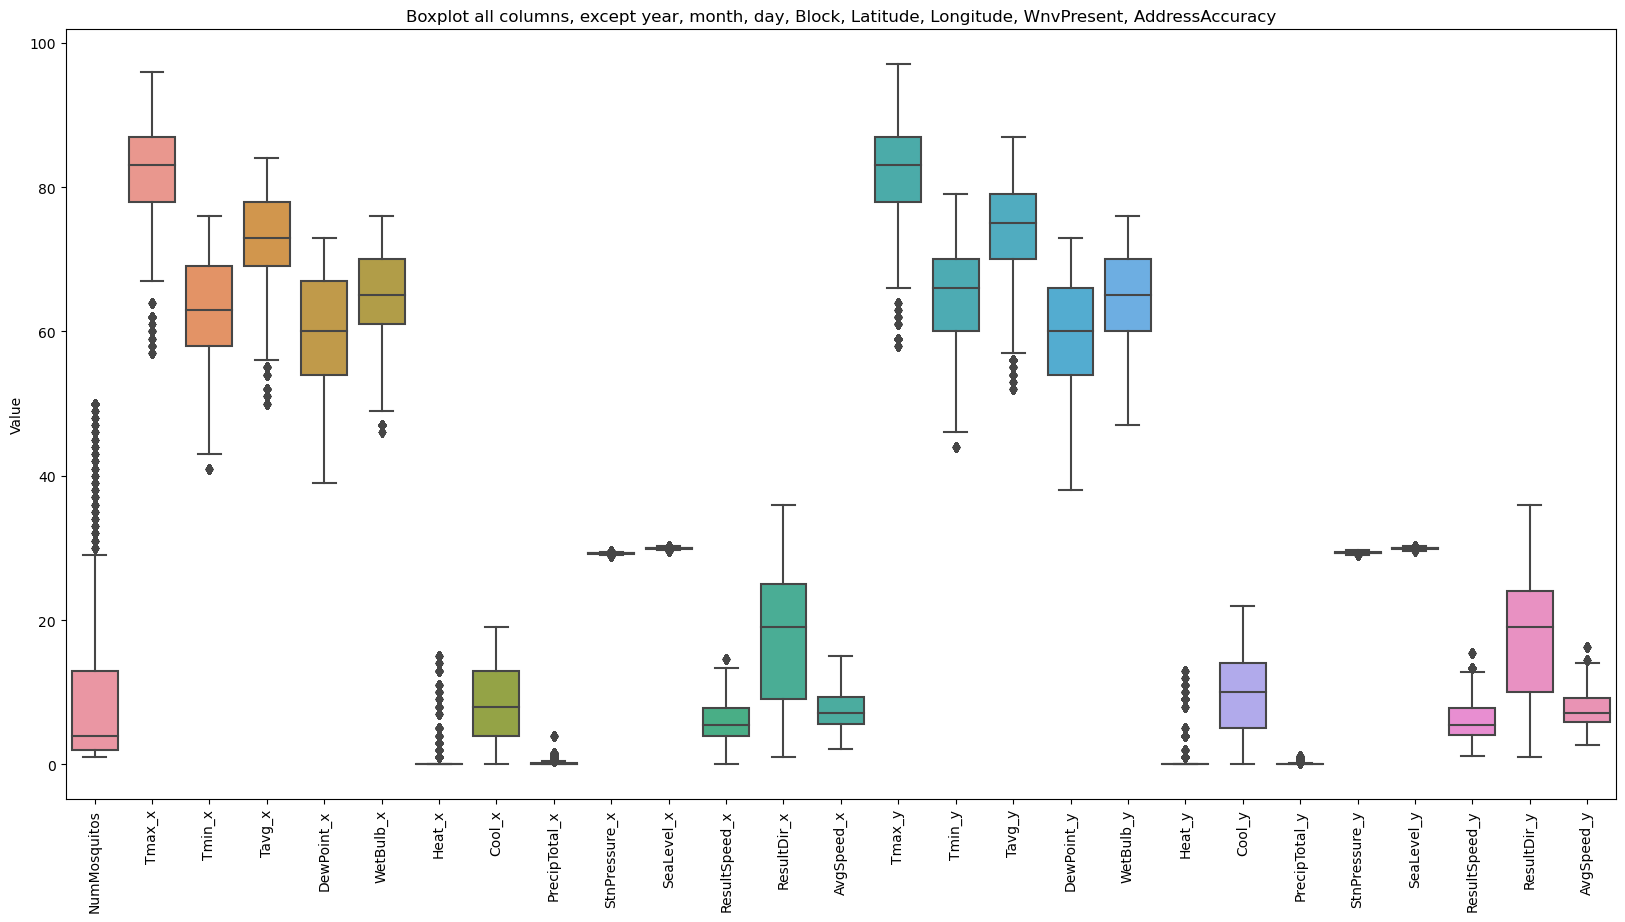

In [31]:
# Plot boxplot for each column on the same graph
plt.figure(figsize=(20,10))
sns.boxplot(data=df_train.drop(['year','month','day','Block','Latitude','Longitude', 'WnvPresent','AddressAccuracy'], axis=1))
plt.xticks(rotation=90)
plt.ylabel('Value')
plt.title('Boxplot all columns, except year, month, day, Block, Latitude, Longitude, WnvPresent, AddressAccuracy')
plt.show()


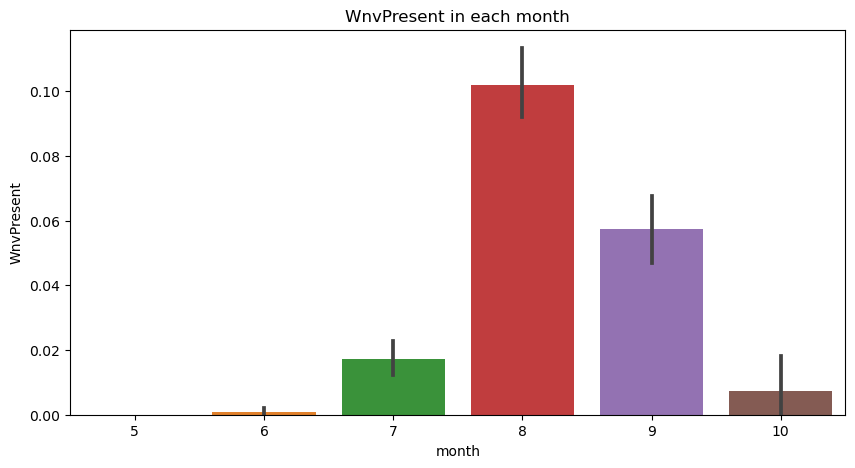

In [32]:
# Plot barplot for WnvPresent in each month
plt.figure(figsize=(10,5))
sns.barplot(x='month', y='WnvPresent', data=df_train)
plt.title('WnvPresent in each month')
plt.show()

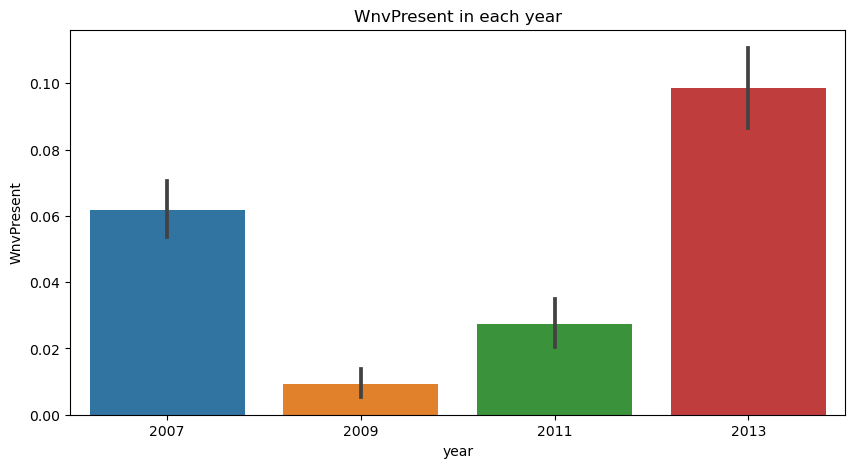

In [33]:
# Plot barplot for WnvPresent in each year
plt.figure(figsize=(10,5))
sns.barplot(x='year', y='WnvPresent', data=df_train)
plt.title('WnvPresent in each year')
plt.show()

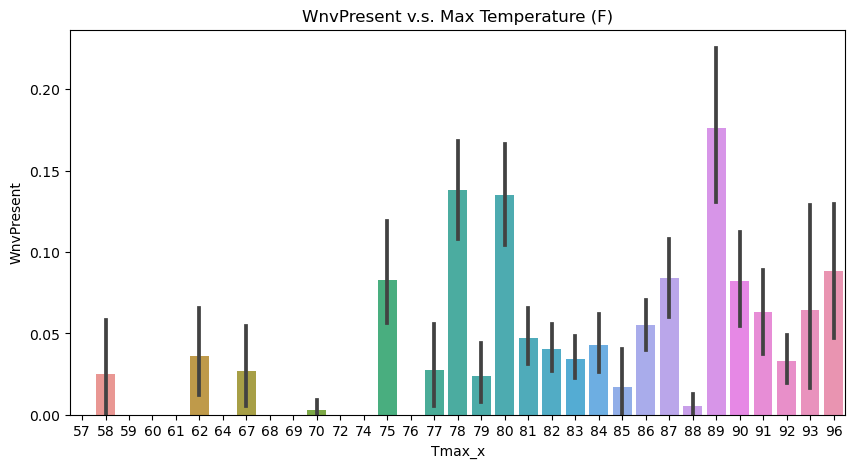

In [34]:
# Plot boxplot for WnvPresent in each Tmax_x
plt.figure(figsize=(10,5))
sns.barplot(x='Tmax_x', y='WnvPresent', data=df_train)
plt.title('WnvPresent v.s. Max Temperature (F)')
plt.show()

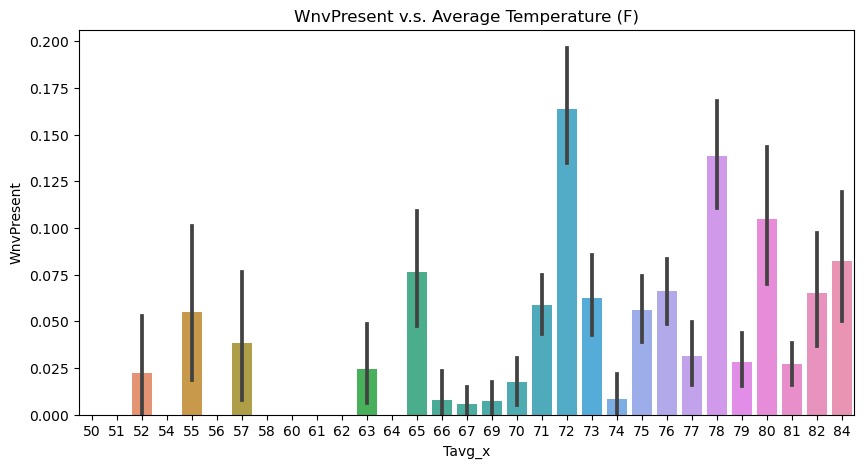

In [35]:
# Plot boxplot for WnvPresent in each Tavg_x
plt.figure(figsize=(10,5))
sns.barplot(x='Tavg_x', y='WnvPresent', data=df_train)
plt.title('WnvPresent v.s. Average Temperature (F)')
plt.show()

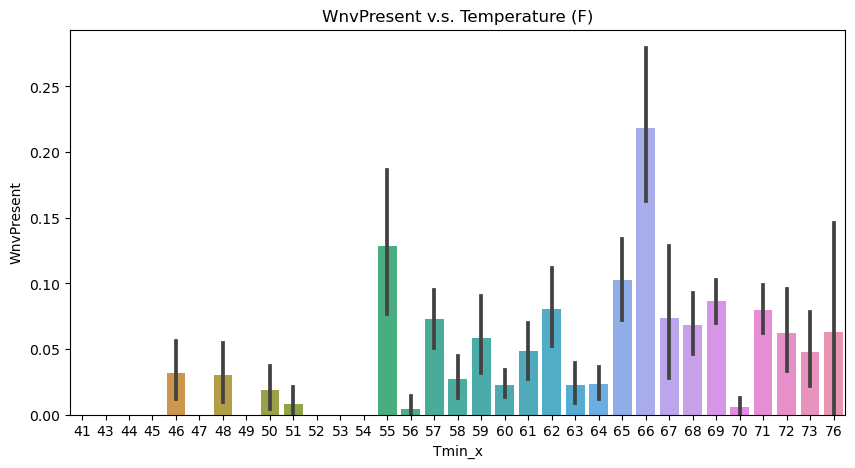

In [36]:
# Plot boxplot for WnvPresent in each Tmin_x
plt.figure(figsize=(10,5))
sns.barplot(x='Tmin_x', y='WnvPresent', data=df_train)
plt.title('WnvPresent v.s. Temperature (F)')
plt.show()

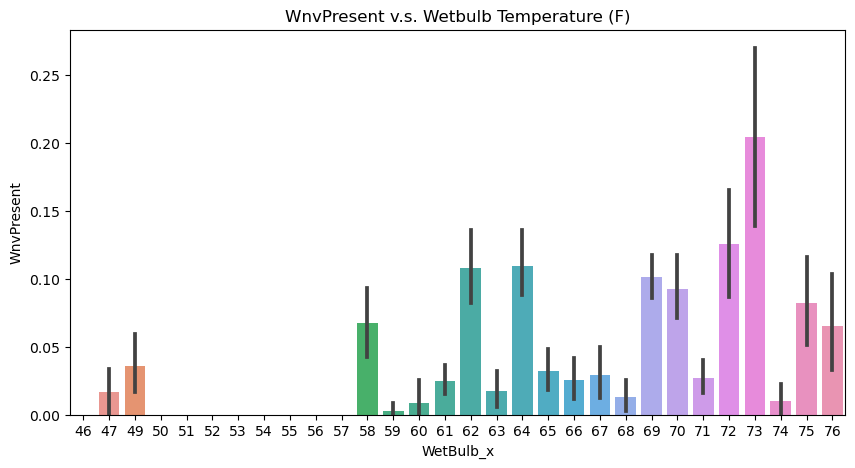

In [37]:
# Plot boxplot for WnvPresent in each WetBulb_x
plt.figure(figsize=(10,5))
sns.barplot(x='WetBulb_x', y='WnvPresent', data=df_train)
plt.title('WnvPresent v.s. Wetbulb Temperature (F)')
plt.show()

C:\Users\ponpa\AppData\Local\Temp\ipykernel_15976\3488363708.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(8,1,2)


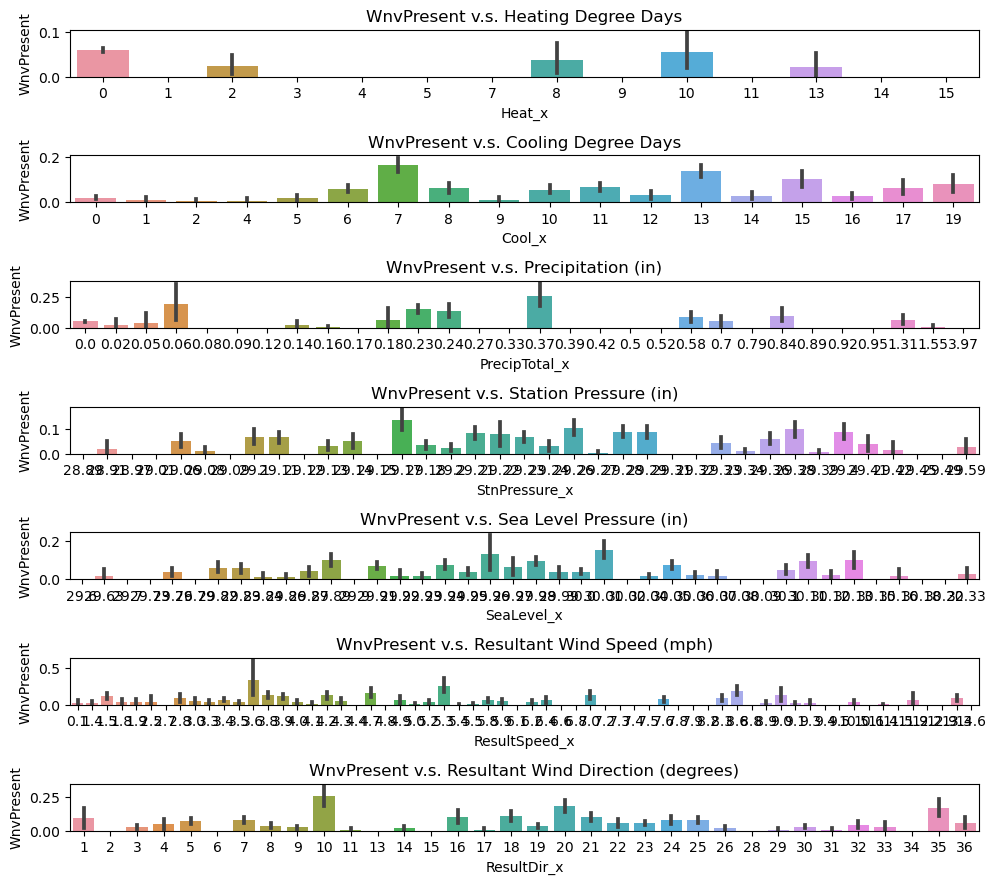

In [38]:
# Plot boxplot for WnvPresent in each weather aspect
plt.figure(figsize=(10,10))
plt.subplot(4,2,1)
sns.barplot(x='DewPoint_x', y='WnvPresent', data=df_train)
plt.title('WnvPresent v.s. Dew Point (F)')
plt.subplot(8,1,2)
sns.barplot(x='Heat_x', y='WnvPresent', data=df_train)
plt.title('WnvPresent v.s. Heating Degree Days')
plt.subplot(8,1,3)
sns.barplot(x='Cool_x', y='WnvPresent', data=df_train)
plt.title('WnvPresent v.s. Cooling Degree Days')
plt.subplot(8,1,4)
sns.barplot(x='PrecipTotal_x', y='WnvPresent', data=df_train)
plt.title('WnvPresent v.s. Precipitation (in)')
plt.subplot(8,1,5)
sns.barplot(x='StnPressure_x', y='WnvPresent', data=df_train)
plt.title('WnvPresent v.s. Station Pressure (in)')
plt.subplot(8,1,6)
sns.barplot(x='SeaLevel_x', y='WnvPresent', data=df_train)
plt.title('WnvPresent v.s. Sea Level Pressure (in)')
plt.subplot(8,1,7)
sns.barplot(x='ResultSpeed_x', y='WnvPresent', data=df_train)
plt.title('WnvPresent v.s. Resultant Wind Speed (mph)')
plt.subplot(8,1,8)
sns.barplot(x='ResultDir_x', y='WnvPresent', data=df_train)
plt.title('WnvPresent v.s. Resultant Wind Direction (degrees)')
plt.tight_layout()

In [39]:
df_train.columns

Index(['Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Tmax_x', 'Tmin_x', 'Tavg_x',
       'DewPoint_x', 'WetBulb_x', 'Heat_x', 'Cool_x', 'PrecipTotal_x',
       'StnPressure_x', 'SeaLevel_x', 'ResultSpeed_x', 'ResultDir_x',
       'AvgSpeed_x', 'Tmax_y', 'Tmin_y', 'Tavg_y', 'DewPoint_y', 'WetBulb_y',
       'Heat_y', 'Cool_y', 'PrecipTotal_y', 'StnPressure_y', 'SeaLevel_y',
       'ResultSpeed_y', 'ResultDir_y', 'AvgSpeed_y', 'day', 'month', 'year'],
      dtype='object')

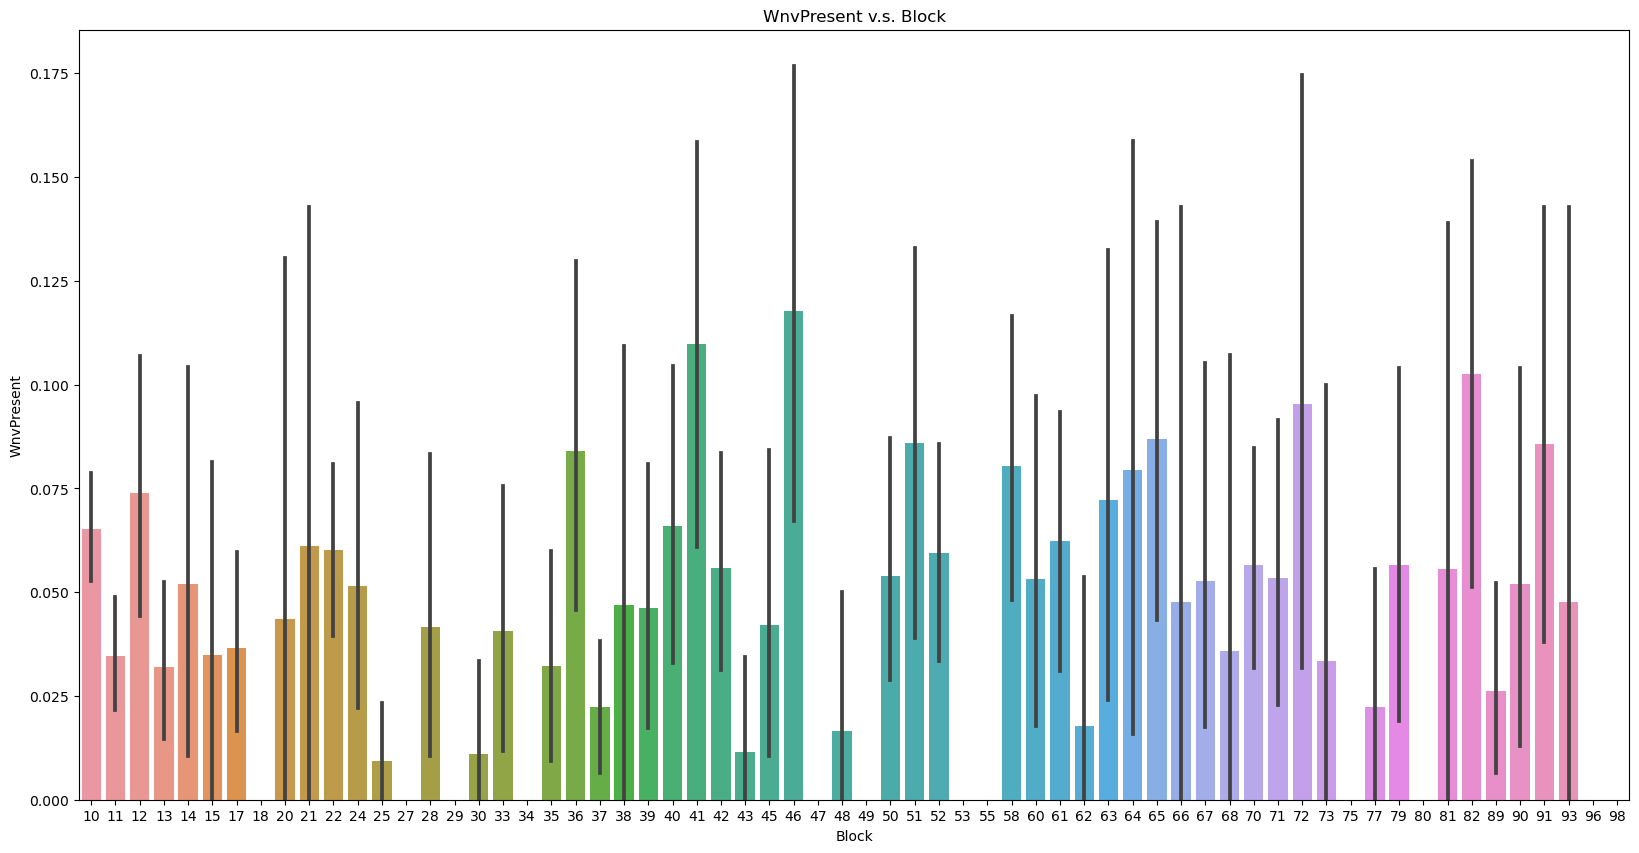

In [40]:
# plot histogram for WnvPresent where x is Block
plt.figure(figsize=(20,10))
sns.barplot(x='Block', y='WnvPresent', data=df_train)
plt.title('WnvPresent v.s. Block')
plt.show()

In [41]:
## plot on Map
fig = px.scatter_mapbox(
    data_frame=df_train,
    title="Present of Virus in Chicago",
    lat="Latitude", lon="Longitude",
    size="NumMosquitos",
    color='WnvPresent',
    zoom=9.5,
    height=800, width=800,
    mapbox_style='open-street-map')
fig.show()

##### Summary of EDA
- The correlation between features and WnvPresent are minimal. Most of correlation found are amoung each weather features.
- It is clear that Virus is likely to be found during Jun - Oct. The highest is Aug. 
- This is also matched the information of temperature where Virus is likely to be found
- It is unclear to relate geolocation such Block to the present of virus.

The only strong indicators are weather, so let's select features heavily rely on weather features

##### Create Data for Model

create both Train and Test data

In [42]:
# Drop some columns that are not useful
# Drop column train
df_train = df_train.drop('Address', axis=1)
df_train = df_train.drop('AddressNumberAndStreet', axis=1)
df_train = df_train.drop('NumMosquitos', axis=1)
print(df_train.shape)

# Drop column test
df_test = df_test.drop('Address', axis=1)
df_test = df_test.drop('AddressNumberAndStreet', axis=1)
print(df_test.shape)

(9601, 37)
(116293, 37)


In [43]:
print(df_train.columns)

Index(['Species', 'Block', 'Street', 'Trap', 'Latitude', 'Longitude',
       'AddressAccuracy', 'WnvPresent', 'Tmax_x', 'Tmin_x', 'Tavg_x',
       'DewPoint_x', 'WetBulb_x', 'Heat_x', 'Cool_x', 'PrecipTotal_x',
       'StnPressure_x', 'SeaLevel_x', 'ResultSpeed_x', 'ResultDir_x',
       'AvgSpeed_x', 'Tmax_y', 'Tmin_y', 'Tavg_y', 'DewPoint_y', 'WetBulb_y',
       'Heat_y', 'Cool_y', 'PrecipTotal_y', 'StnPressure_y', 'SeaLevel_y',
       'ResultSpeed_y', 'ResultDir_y', 'AvgSpeed_y', 'day', 'month', 'year'],
      dtype='object')


In [44]:
print(df_test.columns)

Index(['Id', 'Species', 'Block', 'Street', 'Trap', 'Latitude', 'Longitude',
       'AddressAccuracy', 'Tmax_x', 'Tmin_x', 'Tavg_x', 'DewPoint_x',
       'WetBulb_x', 'Heat_x', 'Cool_x', 'PrecipTotal_x', 'StnPressure_x',
       'SeaLevel_x', 'ResultSpeed_x', 'ResultDir_x', 'AvgSpeed_x', 'Tmax_y',
       'Tmin_y', 'Tavg_y', 'DewPoint_y', 'WetBulb_y', 'Heat_y', 'Cool_y',
       'PrecipTotal_y', 'StnPressure_y', 'SeaLevel_y', 'ResultSpeed_y',
       'ResultDir_y', 'AvgSpeed_y', 'day', 'month', 'year'],
      dtype='object')


In [45]:
# Convert categorical columns to number by using LabelEncoder
label_encoder  = preprocessing.LabelEncoder()

label_encoder.fit(list(df_train['Species'].values) + list(df_test['Species'].values))
df_train['Species'] = label_encoder.transform(df_train['Species'].values)
df_test['Species'] = label_encoder.transform(df_test['Species'].values)

label_encoder.fit(list(df_train['Street'].values) + list(df_test['Street'].values))
df_train['Street'] = label_encoder.transform(df_train['Street'].values)
df_test['Street'] = label_encoder.transform(df_test['Street'].values)

label_encoder.fit(list(df_train['Trap'].values) + list(df_test['Trap'].values))
df_train['Trap'] = label_encoder.transform(df_train['Trap'].values)
df_test['Trap'] = label_encoder.transform(df_test['Trap'].values)

In [46]:
print(df_train.shape)
print(df_test.shape)
# The extra features in train data is the label (WnvPresent) and test data is Id, This will be dropped later during modeling

(9601, 37)
(116293, 37)


In [47]:
# Export data to csv file
df_train.to_csv('../data/train_df.csv', index=False)
df_test.to_csv('../data/test_df.csv', index=False)

---

### Feature improvement

We didn't use spray data, let's see if we can use them

In [48]:
# check the spray data
df_spray

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858
...,...,...,...,...
14830,2013-09-05,8:34:11 PM,42.006587,-87.812355
14831,2013-09-05,8:35:01 PM,42.006192,-87.816015
14832,2013-09-05,8:35:21 PM,42.006022,-87.817392
14833,2013-09-05,8:35:31 PM,42.005453,-87.817423


In [49]:
# convert datetime and extract day, month, year
df_spray['Date'] = pd.to_datetime(df_spray['Date'])
df_spray['day'] = df_spray['Date'].dt.day
df_spray['month'] = df_spray['Date'].dt.month
df_spray['year'] = df_spray['Date'].dt.year


In [50]:
# Spray occur in Jul-Sep 2011 and 2013
df_spray['month'].unique()

array([8, 9, 7])

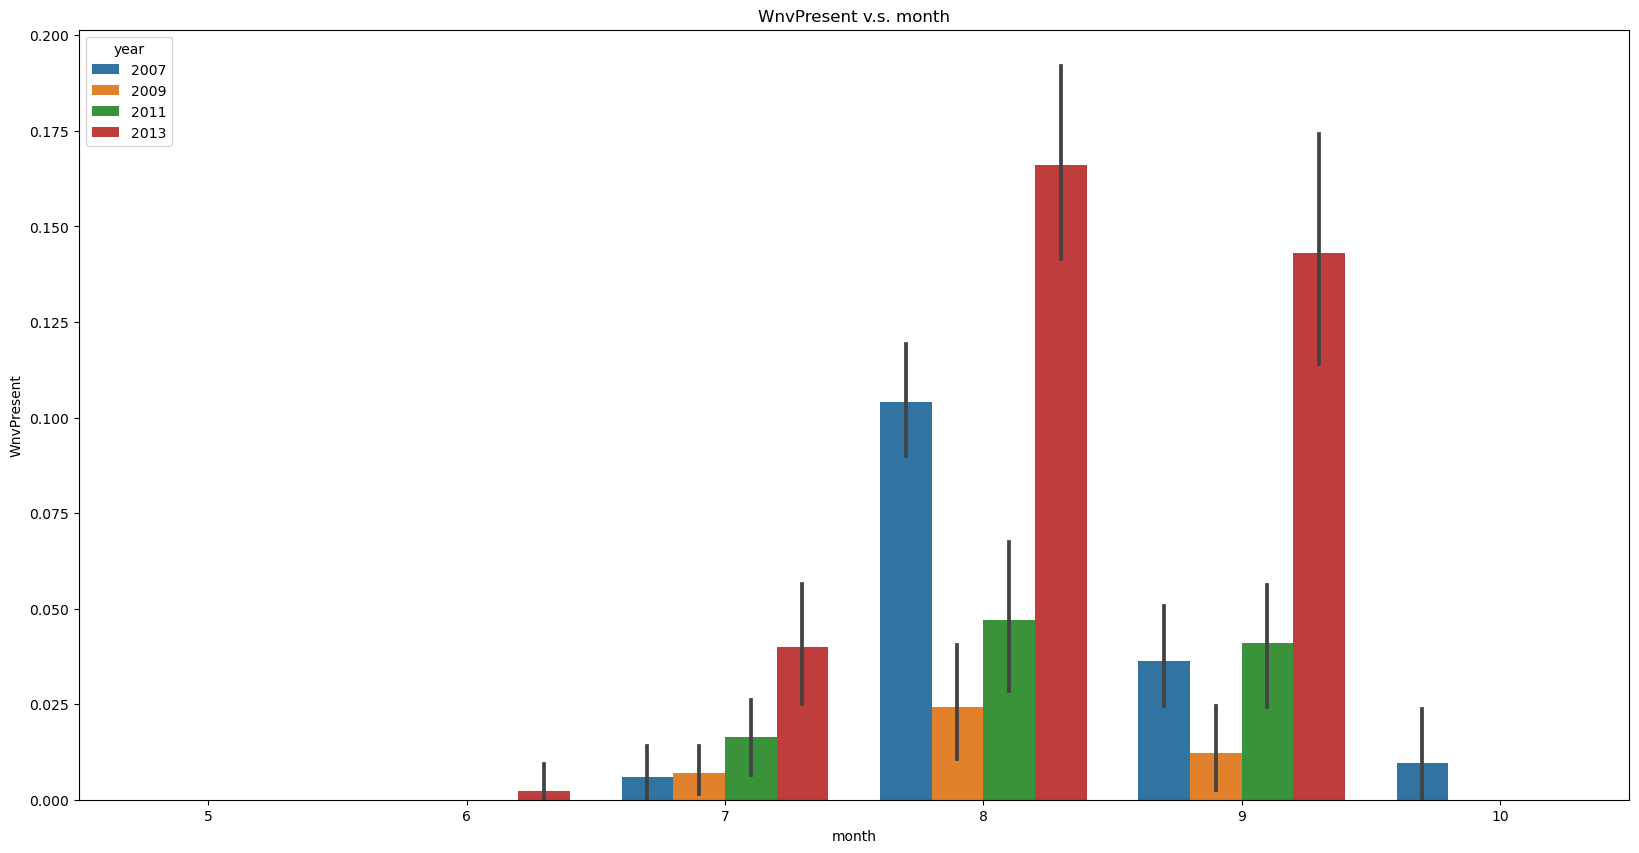

In [51]:
# Let's see the virus present in that time frame
# plot histogram for WnvPresent where x is month for each year
plt.figure(figsize=(20,10))
sns.barplot(x='month', y='WnvPresent', hue='year', data=df_train)
plt.title('WnvPresent v.s. month')
plt.show()

Result:
Data shows that in 2013, when the spray was done. The virous found is the greatest, compare to other year. Is it because they spray in the wrong place?

In [52]:
# Prepare dataframe
df_train2 = pd.read_csv('../data/train.csv')
df_train2['Date'] = pd.to_datetime(df_train2['Date'])
df_spray['Date'] = pd.to_datetime(df_spray['Date'])

# Merge train2 and spray data using Date
df_train2 = df_train2.merge(df_spray, on='Date')


In [53]:
# find distance between train2 and spray
# create function to calculate distance
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers

    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Compute differences
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Haversine formula
    a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = R * c

    return distance

In [54]:
# using haversine function, create new column 'distance' in df_train2 where distance is between Latitude_x, Longitude_x, Latitude_y, Longitude_y
df_train2['distance'] = df_train2.apply(lambda x: haversine(x['Latitude_x'], x['Longitude_x'], x['Latitude_y'], x['Longitude_y']), axis=1)


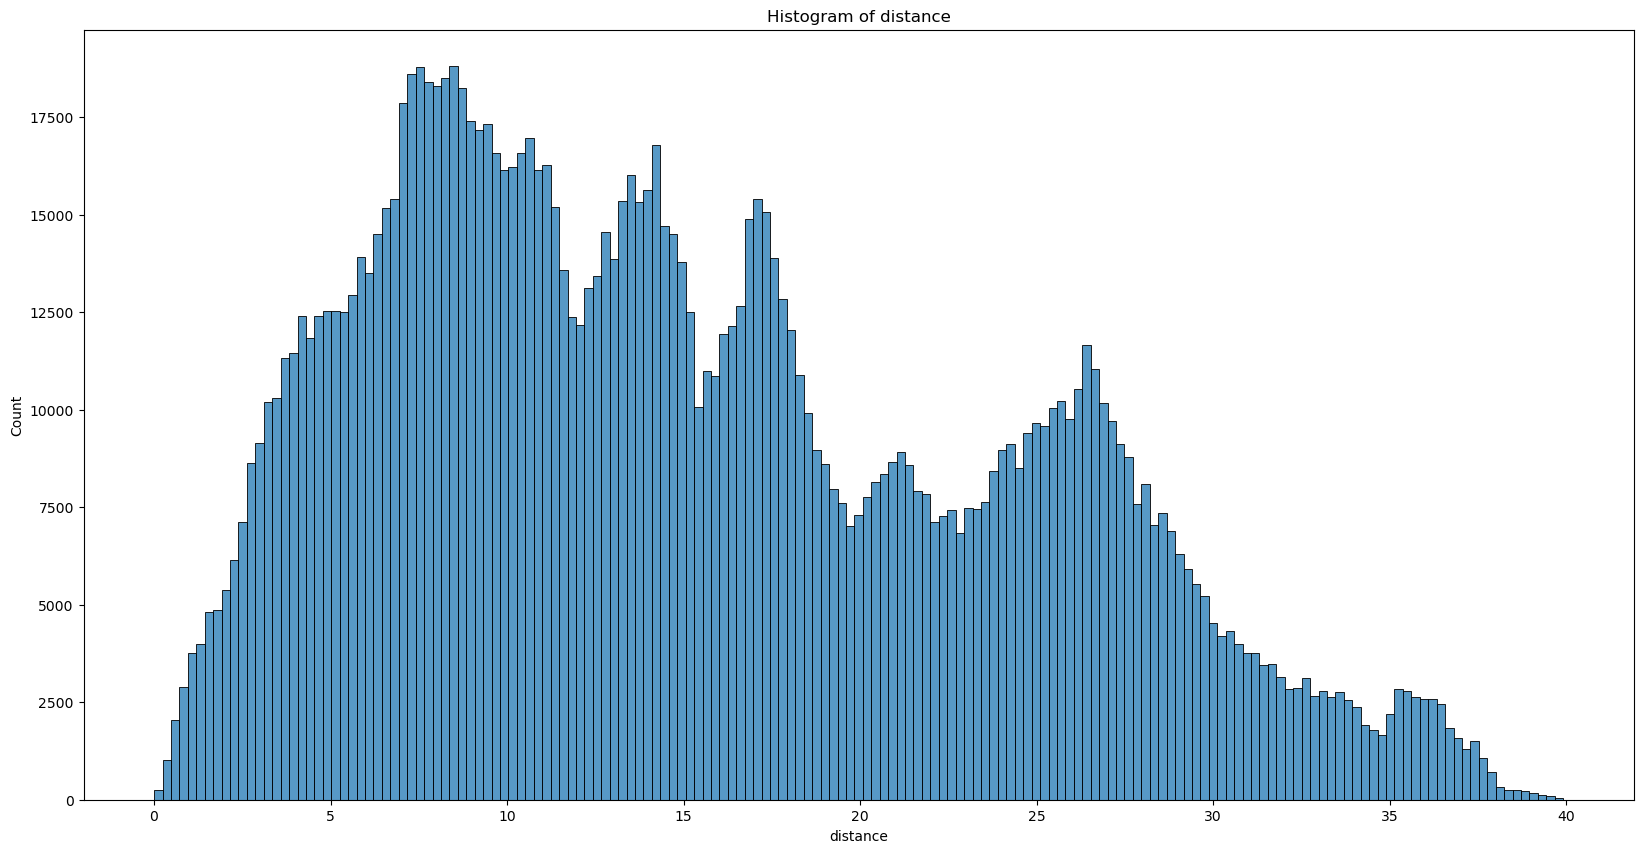

In [55]:
# plot histogram of distance
plt.figure(figsize=(20,10))
sns.histplot(df_train2['distance'])
plt.title('Histogram of distance')
plt.show()

At the given date, where spray is happening. The error distance from Trap is significantly high. It is possible that spray was done in the wrong place, so it doesn't help reduce the virus found rate.

So let's focus on train and weather data

The weather from Station 1 and 2 looks almost identical, perhap we can keep only 1 to reduce the complexity

In [56]:
# drop weather station 2 from df_train
df_train_im = df_train.drop(['Tmax_y','Tmin_y','Tavg_y','DewPoint_y','WetBulb_y','Heat_y','Cool_y','PrecipTotal_y','StnPressure_y','SeaLevel_y','ResultSpeed_y','ResultDir_y','AvgSpeed_y'], axis=1)
df_test_im = df_test.drop(['Tmax_y','Tmin_y','Tavg_y','DewPoint_y','WetBulb_y','Heat_y','Cool_y','PrecipTotal_y','StnPressure_y','SeaLevel_y','ResultSpeed_y','ResultDir_y','AvgSpeed_y'], axis=1)

From error analysis, the visualization of decision tree shows that Tmin (minimum temperature) is shown on the top branches. So let feature engineer on temperatures aspect

In [57]:
# create new columns to be bin of Tmax_x, where bin1 contains 0-8, bin 2 contains 9-16, bin 3 contains 17-24, bin 4 contains 25-32
df_train_im['Tmax_x_bin'] = pd.cut(df_train_im['Tmax_x'], bins=[0,8,16,24,32,40,48,56,64,72,80,88,96,104,112], labels=['bin1','bin2','bin3','bin4','bin5','bin6','bin7','bin8','bin9','bin10','bin11','bin12','bin13','bin14'])
df_train_im['Tavg_x_bin'] = pd.cut(df_train_im['Tavg_x'], bins=[0,8,16,24,32,40,48,56,64,72,80,88,96,104,112], labels=['bin1','bin2','bin3','bin4','bin5','bin6','bin7','bin8','bin9','bin10','bin11','bin12','bin13','bin14'])
df_train_im['Tmin_x_bin'] = pd.cut(df_test_im['Tmin_x'], bins=[0,8,16,24,32,40,48,56,64,72,80,88,96,104,112], labels=['bin1','bin2','bin3','bin4','bin5','bin6','bin7','bin8','bin9','bin10','bin11','bin12','bin13','bin14'])
df_train_im['WetBulb_x_bin'] = pd.cut(df_test_im['WetBulb_x'], bins=[0,8,16,24,32,40,48,56,64,72,80,88,96,104,112], labels=['bin1','bin2','bin3','bin4','bin5','bin6','bin7','bin8','bin9','bin10','bin11','bin12','bin13','bin14'])

df_test_im['Tmax_x_bin'] = pd.cut(df_train_im['Tmax_x'], bins=[0,8,16,24,32,40,48,56,64,72,80,88,96,104,112], labels=['bin1','bin2','bin3','bin4','bin5','bin6','bin7','bin8','bin9','bin10','bin11','bin12','bin13','bin14'])
df_test_im['Tavg_x_bin'] = pd.cut(df_train_im['Tavg_x'], bins=[0,8,16,24,32,40,48,56,64,72,80,88,96,104,112], labels=['bin1','bin2','bin3','bin4','bin5','bin6','bin7','bin8','bin9','bin10','bin11','bin12','bin13','bin14'])
df_test_im['Tmin_x_bin'] = pd.cut(df_test_im['Tmin_x'], bins=[0,8,16,24,32,40,48,56,64,72,80,88,96,104,112], labels=['bin1','bin2','bin3','bin4','bin5','bin6','bin7','bin8','bin9','bin10','bin11','bin12','bin13','bin14'])
df_test_im['WetBulb_x_bin'] = pd.cut(df_test_im['WetBulb_x'], bins=[0,8,16,24,32,40,48,56,64,72,80,88,96,104,112], labels=['bin1','bin2','bin3','bin4','bin5','bin6','bin7','bin8','bin9','bin10','bin11','bin12','bin13','bin14'])

# drop Tmax_x, Tavg_x, Tmin_x, WetBulb_x
df_train_im = df_train_im.drop(['Tmax_x','Tavg_x','Tmin_x','WetBulb_x'], axis=1)
df_test_im = df_test_im.drop(['Tmax_x','Tavg_x','Tmin_x','WetBulb_x'], axis=1)


In [58]:
# dummyfied bin columns
df_train_im = pd.get_dummies(df_train_im, columns=['Tmax_x_bin','Tavg_x_bin','Tmin_x_bin','WetBulb_x_bin'], drop_first=True)
df_test_im = pd.get_dummies(df_test_im, columns=['Tmax_x_bin','Tavg_x_bin','Tmin_x_bin','WetBulb_x_bin'], drop_first=True)

Now we have additional features base on temperature

So let's prepare data to fit with selected model again

In [59]:
# Drop unnecessary columns
df_train_im = df_train_im.drop(['AddressAccuracy'], axis=1)
df_test_im = df_test_im.drop(['AddressAccuracy'], axis=1)


In [60]:
# check number of features
print(df_train_im.shape)
print(df_test_im.shape)

(9601, 71)
(116293, 71)


In [61]:
# export data to csv file
df_train_im.to_csv('../data/train_df_im.csv', index=False)
df_test_im.to_csv('../data/test_df_im.csv', index=False)